# This Jupyter Notebook has the goal to analyse other options to the main CA.

In [2]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 

from sklearn.experimental import enable_iterative_imputer

from sklearn import impute

from sklearn.impute import IterativeImputer

from sklearn.preprocessing import Normalizer

from sklearn.impute import KNNImputer

#from imblearn.over_sampling import SMOTE

In [3]:
ca1 = pd.read_csv("aps_failure_set.csv")

In [4]:
ca1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
ca1.index.values

array([    0,     1,     2, ..., 59997, 59998, 59999])

In [6]:
miss_vals = ["na"]

In [7]:
ca1 = pd.read_csv("aps_failure_set.csv", na_values = miss_vals)

In [8]:
ca1 = pd.get_dummies(ca1)

In [9]:
ca1.drop(columns = "class_pos", inplace = True)

In [10]:
ca1.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,True
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,True
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,True
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,True
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,True


ca1['class'].replace('neg', 0, inplace = True)
ca1['class'].replace('pos', 1, inplace = True)

In [11]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_50 = nperc[nperc > 50]

print(more_than_50)

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [12]:
ca1_d = ca1.dropna(axis = 0)

In [13]:
ca1_d.head(3)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg
16,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,20386.0,...,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0,True
179,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,84938.0,...,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0,True
225,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,194792.0,...,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0,True


In [14]:
ca1_d.count()

aa_000       591
ab_000       591
ac_000       591
ad_000       591
ae_000       591
            ... 
ee_008       591
ee_009       591
ef_000       591
eg_000       591
class_neg    591
Length: 171, dtype: int64

In [15]:
ca1_d.shape

(591, 171)

In [16]:
ca1_class = ca1_d[["class_neg"]]

ca1_class.head(3)

,class_neg
16,True
179,True
225,True


In [17]:
ca1_class.reset_index(inplace = True)

In [18]:
ca1_class.head(3)

,index,class_neg
0,16,True
1,179,True
2,225,True


In [19]:
ca1_class.drop(["index"], axis = 1, inplace = True)

/tmp/ipykernel_36195/2582206424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca1_class.drop(["index"], axis = 1, inplace = True)


In [20]:
ca1_class.head(3)

,class_neg
0,True
1,True
2,True


In [21]:
ca1_d.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_neg
16,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,20386.0,...,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0,True
179,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,84938.0,...,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0,True
225,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,194792.0,...,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0,True
394,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,2037438.0,...,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0,False
413,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,493856.0,...,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0,False


In [22]:
ca1_split = ca1_d.drop(ca1_class, axis = 1)

ca1_split.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,20386.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,84938.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,194792.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,2037438.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,493856.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0


In [23]:
X = ca1_split

y = ca1_class

In [24]:
X.head(3)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,20386.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,84938.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,194792.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0


In [25]:
y.value_counts()

class_neg
True         515
False         76
Name: count, dtype: int64

In [26]:
y.head(3)

,class_neg
0,True
1,True
2,True


In [27]:
imputer = KNNImputer(n_neighbors = 5)


In [28]:
X = imputer.fit_transform(X)


imputer = IterativeImputer(max_iter = 5, random_state = 50)

imputer.fit(X)

X = imputer.transform(X)

In [28]:
tr = Normalizer()

X_scaled = tr.fit_transform(X)

In [29]:
pca = PCA()

pca.fit(X_scaled)

PCA()

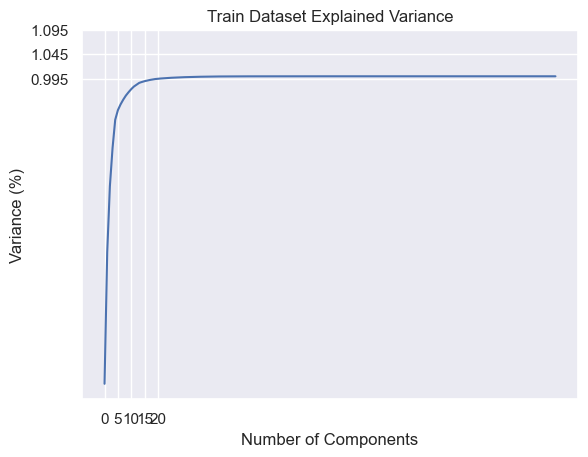

In [30]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.xticks(np.arange(0, 25, 5))
plt.ylabel("Variance (%)")
plt.yticks(np.arange(0.995, 1.1, 0.05))
plt.title("Train Dataset Explained Variance")
plt.show()

In [31]:
pca = PCA(n_components = 15)

ca1_pca = pca.fit_transform(X_scaled)

In [32]:
ca1_pca = pd.DataFrame(ca1_pca)

ca1_pca.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.237505,-0.328444,-0.078833,0.097131,-0.199704,-0.073372,0.093130,0.010803,-0.011533,0.154167,0.133952,-0.053975,-0.074379,0.097260,0.028659
1,-0.239751,-0.161514,-0.112992,0.066627,-0.237885,-0.002753,0.040076,0.070135,0.022987,-0.056247,-0.037361,0.072868,0.069478,0.208022,0.028589
2,0.035592,0.688729,-0.107654,0.074733,0.055482,-0.019891,-0.004040,0.022455,0.030449,-0.046215,0.024274,0.037403,-0.017483,0.008386,0.002284


In [33]:
ca1_concat = pd.concat([ca1_pca, ca1_class], axis = 1)

ca1_concat.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,class_neg
0,-0.237505,-0.328444,-0.078833,0.097131,-0.199704,-0.073372,0.093130,0.010803,-0.011533,0.154167,0.133952,-0.053975,-0.074379,0.097260,0.028659,1
1,-0.239751,-0.161514,-0.112992,0.066627,-0.237885,-0.002753,0.040076,0.070135,0.022987,-0.056247,-0.037361,0.072868,0.069478,0.208022,0.028589,1
2,0.035592,0.688729,-0.107654,0.074733,0.055482,-0.019891,-0.004040,0.022455,0.030449,-0.046215,0.024274,0.037403,-0.017483,0.008386,0.002284,1


In [34]:
ca1_array = ca1_concat.values

In [35]:
ca1_array

array([[-0.23750455, -0.32844359, -0.07883335, ...,  0.09725958,
         0.02865944,  1.        ],
       [-0.23975105, -0.16151395, -0.1129923 , ...,  0.20802167,
         0.02858893,  1.        ],
       [ 0.03559246,  0.688729  , -0.10765443, ...,  0.00838642,
         0.0022843 ,  1.        ],
       ...,
       [-0.00734385,  0.34451302,  0.52461052, ...,  0.02435527,
         0.0185082 ,  1.        ],
       [-0.2146427 , -0.32538224,  0.07561734, ..., -0.01920075,
         0.00714062,  1.        ],
       [-0.2092178 , -0.06659367, -0.20292618, ..., -0.09934531,
        -0.0043081 ,  1.        ]])

In [36]:
X = ca1_array[:,1:15]

y = ca1_array[:,15]

In [37]:
X

array([[-0.32844359, -0.07883335,  0.09713111, ..., -0.07437925,
         0.09725958,  0.02865944],
       [-0.16151395, -0.1129923 ,  0.06662687, ...,  0.06947798,
         0.20802167,  0.02858893],
       [ 0.688729  , -0.10765443,  0.07473339, ..., -0.01748342,
         0.00838642,  0.0022843 ],
       ...,
       [ 0.34451302,  0.52461052, -0.21575598, ...,  0.02238096,
         0.02435527,  0.0185082 ],
       [-0.32538224,  0.07561734,  0.11949678, ..., -0.02757396,
        -0.01920075,  0.00714062],
       [-0.06659367, -0.20292618, -0.11594338, ...,  0.02724799,
        -0.09934531, -0.0043081 ]])

In [38]:
y

array([1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [40]:
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

In [41]:
from sklearn import svm

In [42]:
cls_svm = svm.SVC(kernel = "linear") 

cls_svm.fit(X_train, y_train)

y_pred_svm = cls_svm.predict(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
kNN = KNeighborsClassifier(n_neighbors = 9)

kNN.fit(X_train, y_train)

y_pred_knn = kNN.predict(X_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 50)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [47]:
y_pred_rf = rf_classifier.predict(X_test)

In [48]:
print("Accuracy SVM:", metrics.accuracy_score(y_test, y_pred_svm))

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred_knn))

print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy SVM: 0.9327731092436975
Accuracy KNN: 0.9243697478991597
Accuracy RF: 0.9747899159663865


In [50]:
print("Classification Report SVM:", classification_report(y_test, y_pred_svm, zero_division = 1))

print("Classification Report KNN:", classification_report(y_test, y_pred_knn, zero_division = 1))

print("Classification Report RF:", classification_report(y_test, y_pred_rf, zero_division = 1))

Classification Report SVM:               precision    recall  f1-score   support

         0.0       1.00      0.00      0.00         8
         1.0       0.93      1.00      0.97       111

    accuracy                           0.93       119
   macro avg       0.97      0.50      0.48       119
weighted avg       0.94      0.93      0.90       119

Classification Report KNN:               precision    recall  f1-score   support

         0.0       0.44      0.50      0.47         8
         1.0       0.96      0.95      0.96       111

    accuracy                           0.92       119
   macro avg       0.70      0.73      0.71       119
weighted avg       0.93      0.92      0.93       119

Classification Report RF:               precision    recall  f1-score   support

         0.0       1.00      0.62      0.77         8
         1.0       0.97      1.00      0.99       111

    accuracy                           0.97       119
   macro avg       0.99      0.81      0.88     